In [9]:
!python3 -m pip install xarray
!python3 -m pip install plotly
!python3 -m pip install geopandas
!python3 -m pip install rasterstats
!python3 -m pip install affine

In [10]:
%matplotlib inline
%qtconsole

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py
py.sign_in('ctasich', 'fpoe1n01ek')

from datetime import datetime, timedelta
from scipy import stats

import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from utilities import hydroshare
import rasterstats as rs
from rasterio import features
from affine import Affine

import glob # check folder for similar file formats

In [11]:
## Load Data

# GRACE data
nc = 'https://opendap.jpl.nasa.gov:443/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201701.GLO.RL05M_1.MSCNv02CRIv02.nc'
grace = xr.open_dataset(nc)

# Well data
#csv = 'https://www.hydroshare.org/django_irods/download/d3659dcf575d4090801a74d1ce096d7c/data/contents/WPDx_Well_Function_Upd_151224_xy161117.csv'
csv = os.path.join('/home/jovyan/work/notebooks/haackwell','dat','well-data-2001-2015-no-rainwater.csv')
wells = pd.read_csv(csv)

In [26]:
hs=hydroshare.hydroshare()
hs.getResourceFromHydroShare('bf7b1abb7ec14599b644116d20efebd5')

Adding the following system variables:
   HS_USR_NAME = jphuong
   HS_RES_ID = 87dc5742cf164126a11ff45c3307fd9d
   HS_RES_TYPE = compositeresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => jphuong
Successfully established a connection with HydroShare
This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? y
Download Finished                               
Successfully downloaded resource bf7b1abb7ec14599b644116d20efebd5


In [28]:
# map the Kenyan shapefile path
kenp = hs.content['KEN_adm1.shp']

'../../data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm1.shp'

In [38]:
# map the parent directory for the shapefiles
HW2017 = os.path.join(kenp, os.pardir)

In [39]:
# retrieve the shapefile for kenya
# country boundary
Ken=gpd.read_file(kenp)
Ken

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,118,KEN,Kenya,1,Baringo,KE.BA,30,None,County,County,None,None,(POLYGON ((35.67241287231445 1.073058485984859...
1,118,KEN,Kenya,2,Bomet,KE.BO,36,None,County,County,None,None,POLYGON ((35.47388458251964 -0.395235478877907...
2,118,KEN,Kenya,3,Bungoma,KE.BN,39,None,County,County,None,None,"POLYGON ((34.61786651611339 1.108357429504508,..."
3,118,KEN,Kenya,4,Busia,KE.BS,40,None,County,County,None,None,"POLYGON ((34.3676567077639 0.7769606113433269,..."
4,118,KEN,Kenya,5,Elgeyo-Marakwet,KE.EM,28,None,County,County,None,None,(POLYGON ((35.46704483032249 1.007656216621456...
5,118,KEN,Kenya,6,Embu,KE.EB,14,None,County,County,None,None,(POLYGON ((37.31633377075212 -0.15351638197898...
6,118,KEN,Kenya,7,Garissa,KE.GA,7,None,County,County,None,None,"POLYGON ((39.5841064453125 0.7246704101563637,..."
7,118,KEN,Kenya,8,Homa Bay,KE.HB,43,None,County,County,None,None,POLYGON ((34.76070404052763 -0.308018475770950...
8,118,KEN,Kenya,9,Isiolo,KE.IS,11,None,County,County,None,None,"POLYGON ((38.96176147460943 2.099157094955558,..."
9,118,KEN,Kenya,10,Kajiado,KE.KJ,34,None,County,County,None,None,"POLYGON ((36.5361900329591 -1.152136445045414,..."


In [71]:
# read many shape file in the folder
gdfs = {} # load the empty dictionary 

# loop through the adm2 shapfile
for fname in glob.glob(os.path.abspath(os.path.join(HW2017,'*_adm2.shp'))):
    print(fname)
    gdfs[fname.split('.')[0]] = gpd.read_file(fname)

/home/jovyan/work/notebooks/data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/UGA_adm2.shp
/home/jovyan/work/notebooks/data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm2.shp
/home/jovyan/work/notebooks/data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/TZA_adm2.shp


In [44]:
gdfs

{'/home/jovyan/work/notebooks/data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm2':      ID_0  ISO NAME_0  ID_1       NAME_1  ID_2           NAME_2 HASC_2  CCN_2  \
 0     118  KEN  Kenya     1      Baringo     1              805   None    162   
 1     118  KEN  Kenya     1      Baringo     2  Baringo Central   None    159   
 2     118  KEN  Kenya     1      Baringo     3    Baringo North   None    158   
 3     118  KEN  Kenya     1      Baringo     4    Baringo South   None    160   
 4     118  KEN  Kenya     1      Baringo     5    Eldama Ravine   None    162   
 5     118  KEN  Kenya     1      Baringo     6          Mogotio   None    161   
 6     118  KEN  Kenya     1      Baringo     7            Tiaty   None    157   
 7     118  KEN  Kenya     2        Bomet     8    Bomet Central   None    197   
 8     118  KEN  Kenya     2        Bomet     9       Bomet East   None    196   
 9     118  KEN  Kenya     2        Bomet    10       C

In [45]:
dfs_all = pd.concat([gdf for gdf in gdfs.values()])

In [46]:
gdfs_all = GeoDataFrame(dfs_all, crs={'init': 'epsg:4326'})

In [76]:
print(len(gdfs_all['geometry']))
gdfs_all['geometry'].tail()

658


297    POLYGON ((35.06056594848638 1.505142450332698,...
298    POLYGON ((35.1104698181154 2.650082826614494, ...
299    (POLYGON ((35.06106948852556 1.504904508590641...
300    POLYGON ((35.3549995422365 1.562399387359733, ...
301    POLYGON ((35.37177276611351 1.931949734688033,...
Name: geometry, dtype: object

In [48]:
#def getXY(pt):
#    return (pt.x, pt.y)


#centroidlist = map(getXY, centroidseries)

In [78]:
# abstract the centroids for the adm2 polygons
centroidseries = gdfs_all['geometry'].centroid

# convert the centroids into a geodataframe
gdf = gpd.GeoDataFrame(centroidseries.reset_index()).rename(columns={'index':'shape_index', 0:'adm2_centroid'})

# extract the longitude and latitude coordinate values into two columns
gdf['LONG'] = gdf.adm2_centroid.map(lambda x: x.x)
gdf['LAT'] = gdf.adm2_centroid.map(lambda x: x.y)
gdf.tail()

,shape_index,adm2_centroid,LONG,LAT
653,297,POINT (35.06127978571782 1.504931934899342),35.061280,1.504932
654,298,POINT (35.11224207860936 2.059376661333852),35.112242,2.059377
655,299,POINT (35.14538363322598 1.512716267861251),35.145384,1.512716
656,300,POINT (35.31091424995017 1.307060316850913),35.310914,1.307060
657,301,POINT (35.54479064625539 1.567476168653185),35.544791,1.567476


In [67]:
# check GeoDataframe
#gdfs['TZA_adm2'].head()

In [69]:
#print(gdfs['geometry'])

In [79]:
# check the raster file (here use grace as example)
grace

<xarray.Dataset>
Dimensions:        (lat: 360, lon: 720, time: 159)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
  * lat            (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 ...
  * time           (time) datetime64[ns] 2002-04-16 2002-05-10 ...
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
Attributes:
    Conventions:                CF-1.5
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   CF-1.5
    title:                      JPL RL05M.1-CRI
    summary:                    Monthly gravity solutions from GRACE as deter...
    filename:                   NETCDF/OFFICIAL_V2/GRCTellus.JPL.200204_20170...
    variable:                   liquid_water_equivalent_thickness
    platform:                   GRACE
    instrument:                 GRACE
    institution:                JPL
    creator_name:               David Wiese

In [85]:
#thickness_variable
gw = grace['lwe_thickness']
gw.coords

Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * time     (time) datetime64[ns] 2002-04-16 2002-05-10 2002-08-16T12:00:00 ...

In [81]:
# Define the transform and rasterize in xarray
def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.
    """
    transform = transform_from_latlon(coords['latitude'], coords['longitude'])
    out_shape = (len(coords['latitude']), len(coords['longitude']))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    return xray.DataArray(raster, coords=coords, dims=('latitude', 'longitude'))

In [93]:
eachrow['LONG']

36.67536429201196

In [84]:
for ind, each in gdf.iterrows():
    print(ind, each)
    break

0 shape_index                                                 0
adm2_centroid    POINT (36.67536429201196 -3.437963753556593)
LONG                                                  36.6754
LAT                                                  -3.43796
Name: 0, dtype: object


In [90]:
gw.sel_points(lon=eachrow['LONG'], lat=eachrow['LAT'], method='nearest')

KeyError: -3.437963753556593

In [83]:
pgw=dict()

for ind, eachrow in gdf.iterrows():
    pgw[ind] = gw.sel_points(lon=eachrow['LONG'], lat=eachrow['LAT'], method='nearest')

pgw.items()

ValueError: Indexers must be 1 dimensional

In [ ]:
# get the geometry of the country admin
shapes = [(shape, n) for n, shape in enumerate(us_states.geometry)]


In [ ]:
# mask the xrrary based on the polygon
gw['countries'] = rasterize(shapes, gw.coords)





In [ ]:



# grace_time_series
time_series =grace['lwe_thickness'].sel(time=slice('2002-04-16', '2016-12-31'), latitude=75.0, longitude=180.0)

# convert the xrray to raster

# file path
#ppt_july_tif_pth = os.path.join(nc, 'prism_precipitation_july_climatology.tif')


In [15]:

# use the raster statistic to get the mean of GRACE values for each country 
# need to figure out the file path problem
zonal_grace_af_gjson = rs.zonal_stats(gdfs['TZA_adm2'], grace, prefix='grace_',
                                 geojson_out=True)

zonal_faf_gdf = GeoDataFrame.from_features(zonal_grace_af_gjson)
zonal_faf_gdf.head(2)


TypeError: invalid path: <xarray.Dataset>
Dimensions:        (lat: 360, lon: 720, time: 159)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
  * lat            (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 ...
  * time           (time) datetime64[ns] 2002-04-16 2002-05-10 ...
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
Attributes:
    Conventions:                CF-1.5
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   CF-1.5
    title:                      JPL RL05M.1-CRI
    summary:                    Monthly gravity solutions from GRACE as deter...
    filename:                   NETCDF/OFFICIAL_V2/GRCTellus.JPL.200204_20170...
    variable:                   liquid_water_equivalent_thickness
    platform:                   GRACE
    instrument:                 GRACE
    institution:                JPL
    creator_name:               David Wiese
    creator_email:              david.n.wiese@jpl.nasa.gov
    project:                    GRACE
    id:                         doi:10.5067/TEMSC-2LCR5
    data_source:                GRACE JPL RL05M.1-CRI
    data_source_version:        v2.0, CRIv2.0
    time_epoch:                 2002-01-01 00:00:00 UTC
    time_coverage_start:        2002-04-16
    time_coverage_end:          2017-1-21
    geospatial_lat_min:         -89.75
    geospatial_lat_max:         89.75
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.5 degree grid; however the native resolutio...
    geospatial_lon_min:         0.25
    geospatial_lon_max:         359.75
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.5 degree grid; however the native resolutio...
    time_mean_removed:          2004.000 to 2009.999
    months_missing:             2002-06;2002-07;2003-06;2011-01;2011-06;2012-...
    postprocess1:                OCEAN_ATMOSPHERE_DEALIAS_MODEL (GAD), MONTHL...
    postprocess2:               Coastline Resolution Improvement (CRI) filter...
    GIA_removed:                 A, G., Wahr, and Zhong (2013), Geophys. J. I...
    Geocenter_correction:       Swenson, Chambers, and Wahr (2008), J. Geophy...
    C_20_Substitution:          Cheng, M., Ries, and Tapley (2011), J. Geophy...
    User%20Note:                The accelerometer on the GRACE-B spacecraft w...
    journal_reference:          Watkins, M. M., D. N. Wiese, D.-N. Yuan, C. B...
    DATE_CREATED:               24-Jul-2017 13:12:34

In [4]:
## Preprocess data

## Wells
wells['color'] = np.where(wells['FUNC']=='Yes', '#2ECC71', '#E74C3C')

## GRACE
rmap = grace['lwe_thickness'][0,:,:]

# Extract Lat/Lon Metadata
lat_min = grace.geospatial_lat_min
lat_max = grace.geospatial_lat_max
lat_res = float(grace.geospatial_lat_resolution[0:3])

lon_min = grace.geospatial_lon_min
lon_max = grace.geospatial_lon_max
lon_res = float(grace.geospatial_lon_resolution[0:3])

/opt/conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/opt/conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



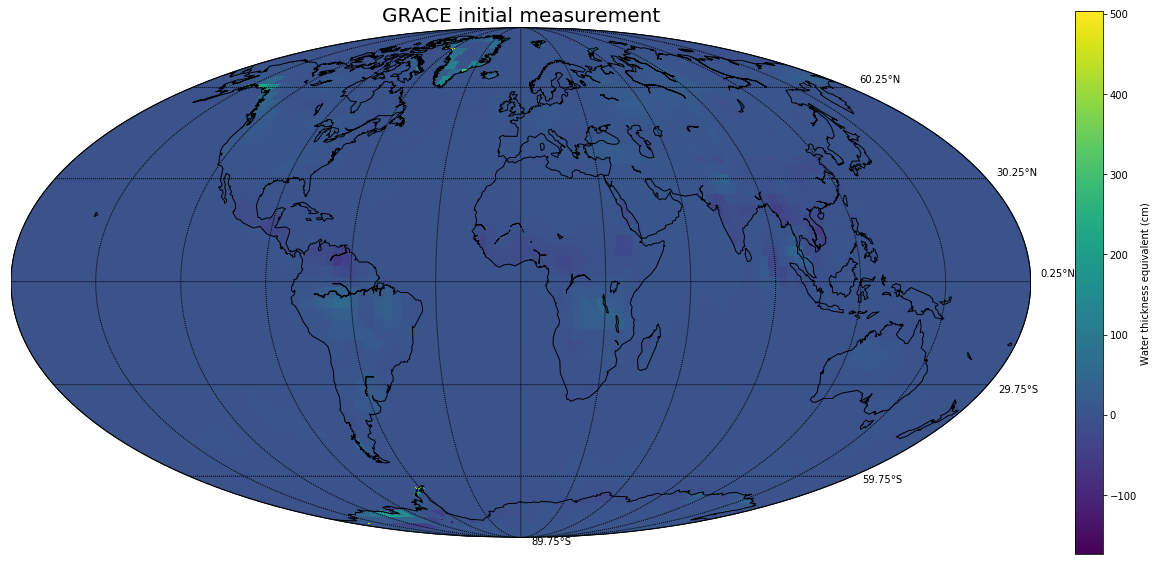

In [5]:
## Plot GRACE data

# Build grid
lon_g = np.arange(lon_min,lon_max+lon_res,lon_res)
lat_g = np.arange(lat_min,lat_max+lat_res,lat_res)
x,y = np.meshgrid(lon_g[:], lat_g[:])

# Plot Fig
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw parallels and meridians.
parallels = np.arange(-89.75,89.75,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',latlon=True)
m.drawcoastlines();
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Water thickness equivalent (cm)')
plt.title('GRACE initial measurement',size=20);

In [6]:
## Plot well data in plotly

data = [ dict(
    lat = wells.LAT_DD,
    lon = wells.LONG_DD,
    marker = dict(
        color = wells.color.tolist(),
        opacity = 0.7,
        size = 2,                
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 10,
        projection = dict(
            type = 'utm'),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -20, 80 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -20, 40 ],
            dtick = 5
        )
    ),
    title = 'Wells from WPDx',
)
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='wells')

In [10]:
# Code that subselects regions of interest. This is for all of Africa, but will be used later to get individual time series

data = xr.open_dataset('https://opendap.jpl.nasa.gov:443/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201701.GLO.RL05M_1.MSCNv02CRIv02.nc')
af = xr.concat( [data['lwe_thickness'].sel(lat=slice(-37.75,37.75)).sel(lon=slice(340.25,359.75)),
                  data['lwe_thickness'].sel(lat=slice(-37.75,37.75)).sel(lon=slice(0.25,50.75))],
                  dim='lon')

lonaf = xr.concat( [data['lon'].sel(lon=slice(340.25,359.75)),
                  data['lon'].sel(lon=slice(0.25,50.75))],
                  dim='lon')

lataf = data['lat'].sel(lat=slice(-37.75,37.75))


In [11]:
# Find nearest grid locations for all data
# lon_g and lat_g are the lons and lats of the gridded products, respectively
# nb this is only for Africa for now! Change things in the previous cell if you want to deal with the global GRACE dataset.

lon_g = lonaf
lat_g = lataf

xRes = np.median(np.diff(lon_g))
yRes = np.median(np.diff(lat_g))

# Define grid box centers
lon_c = lon_g[:-1]+xRes/2
lat_c = lat_g[:-1]+yRes/2

# Define a new metadata file that has grid coordinates for this resolution choice
wg = wells

wg.loc[:,'grid_lat'] = np.nan
wg.loc[:,'grid_lon'] = np.nan
wg.loc[:,'grace_mean'] = np.nan
wg.loc[:,'grace_std'] = np.nan
wg.loc[:,'grace_at_rpt_date'] = np.nan

## Determine grid_lat and grid_lon for every record

for index, row in wg.iterrows():
    lon_s = row[u'LONG_DD']
    lat_s = row[u'LAT_DD']
    # correct for wrapping
    if lon_s<0:
        lon_s = 360+lon_s
    glat = lat_g.values[np.argmin(np.abs(lat_c.values-lat_s))]
    glon = lon_g.values[np.argmin(np.abs(lon_c.values-lon_s))]
    wg.set_value(index,'grid_lat',glat)
    wg.set_value(index,'grid_lon',glon)

# Get all unique grid_lat and grid_lon pairs. Don't totally understand this bit of magic...
allpairs = wg[['grid_lat', 'grid_lon']].values
upairs = np.array(list(set(tuple(p) for p in allpairs)))

# GRACE at well locations. sel_points is necessary to get coordinate pairs.
wellG = data['lwe_thickness'].sel_points(lat=upairs[:,0],lon=upairs[:,1])




In [12]:
# Loop through the dataframe again and compute stats!

for index, row in wg.iterrows():
    glat = row[u'grid_lat']
    glon = row[u'grid_lon']

    # get the corresponding point
    pt = wellG[(wellG['lat']==glat).values & (wellG['lon']==glon).values].points.values
    allhere = wellG.sel(points=pt)
    wg.set_value(index,'grace_mean',np.mean(allhere.values))
    wg.set_value(index,'grace_std',np.std(allhere.values))

    dda = row[u'RPT_DATE']
    dgr = allhere['time'].values
    best_gr_ind = np.argmin(np.abs(pd.to_datetime(dgr)-pd.to_datetime(dda)))

    wg.set_value(index,'grace_at_rpt_date',np.squeeze(allhere.values)[best_gr_ind])




In [13]:
# Take a look
wg

,WELL_ID,LAT_DD,LONG_DD,FUNC,STATUS,COD_FCN,COD_QTY,COD_RESRCE,ADM1,ADM2,...,MGMT,PAY,SOURCE,RPT_DATE,color,grid_lat,grid_lon,grace_mean,grace_std,grace_at_rpt_date
0,362092,5.982436,-8.180609,Yes,Working but with problems. Well polluted|Under...,2,1,0,Grand Gedeh,Tchien,...,NaN,No water committee,WASH Liberia,21/01/2011,#2ECC71,5.75,351.75,1.643669,15.523674,3.927065
1,362100,5.899207,-8.173315,Yes,Working but with problems. Well polluted|Under...,2,1,0,Grand Gedeh,Tchien,...,NaN,No water committee,WASH Liberia,21/01/2011,#2ECC71,5.75,351.75,1.643669,15.523674,3.927065
2,357349,5.802157,-9.645714,Yes,Working but with problems. Not priming,2,1,0,Rivercess,Norwein,...,NaN,No water committee,WASH Liberia,02/02/2011,#2ECC71,5.75,350.25,1.643669,15.523674,3.927065
3,489514,-0.541100,34.375820,No,Drought|No operation in the dry season,999,0,1,Homa Bay,Mbita,...,0,No payment system,Engineering Sciences & Global Development,24/01/2011,#E74C3C,-0.75,34.25,1.643669,15.523674,3.927065
4,357595,5.716055,-9.618187,No,Broken Down System. low water table,0,1,1,Rivercess,Norwein,...,NaN,No water committee,WASH Liberia,03/02/2011,#E74C3C,5.25,350.25,1.643669,15.523674,3.927065
5,489266,-0.730000,34.366000,No,No fuel|No operation at least once a week,2,1,0,Homa Bay,Ndhiwa,...,Private Operator/Delegated Management,Per Bucket,Engineering Sciences & Global Development,18/02/2011,#E74C3C,-0.75,34.25,1.643669,15.523674,3.927065
6,489625,-0.450333,34.009880,No,Low yield|No operation in the dry season,2,1,1,Homa Bay,Mbita,...,Institutional Management,No payment system,Engineering Sciences & Global Development,02/10/2011,#E74C3C,-0.75,33.75,1.643669,15.523674,3.927065
7,364570,5.231378,-9.141873,Yes,Working but with problems. Well polluted|Under...,2,1,0,Sinoe,Sanquin Dist#2,...,Community Management,Yes but only in case of breakdown,WASH Liberia,27/01/2011,#2ECC71,4.75,350.75,1.643669,15.523674,3.927065
8,361779,5.225134,-8.121493,Yes,Working but with problems. insufficient water,2,1,0,River Gee,Karforh,...,NaN,No water committee,WASH Liberia,18/02/2011,#2ECC71,4.75,351.75,1.643669,15.523674,3.927065
9,361780,5.225422,-8.119787,Yes,Working but with problems. insufficient water,2,1,0,River Gee,Karforh,...,NaN,No water committee,WASH Liberia,18/02/2011,#2ECC71,4.75,351.75,1.643669,15.523674,3.927065


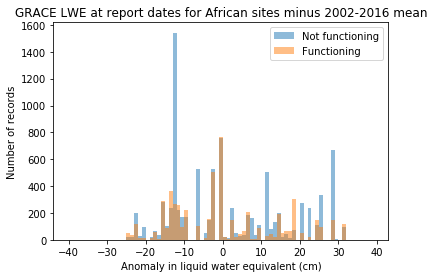

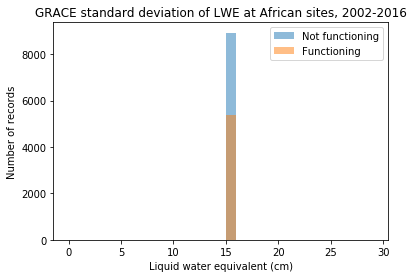

In [14]:
# Is there any relationship between GRACE and the well data?

# 1. Compare g_mean to g_rpt. Make 2 histograms, one for working and one for not. Anything there?


# differences between mean and report time GRACE values
d_mean_rpt_yes = wg[wg['FUNC']=='Yes' ]['grace_at_rpt_date']-wg[wg['FUNC']=='Yes']['grace_mean']
d_mean_rpt_no  = wg[wg['FUNC']=='No'  ]['grace_at_rpt_date']-wg[wg['FUNC']=='No' ]['grace_mean']

bins = np.arange(-40,40)

plt.hist(d_mean_rpt_yes,bins=bins,alpha=0.5,label='Not functioning')
plt.hist(d_mean_rpt_no ,bins=bins,alpha=0.5,label='Functioning')
plt.ylabel('Number of records')
plt.title('GRACE LWE at report dates for African sites minus 2002-2016 mean',size=12)
plt.legend(loc='upper right')
plt.xlabel('Anomaly in liquid water equivalent (cm)')
plt.show()

# 2. Histograms of g_std for working and not. Any difference?

d_std_yes = wg[wg['FUNC']=='Yes' ]['grace_std']
d_std_no  = wg[wg['FUNC']=='No'  ]['grace_std']

bins = np.arange(0,30)

plt.hist(d_std_yes,bins=bins,alpha=0.5,label='Not functioning')
plt.hist(d_std_no ,bins=bins,alpha=0.5,label='Functioning')
plt.ylabel('Number of records')
plt.title('GRACE standard deviation of LWE at African sites, 2002-2016')
plt.legend(loc='upper right')
plt.xlabel('Liquid water equivalent (cm)')
plt.show()

